# Handling Missing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [3]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [4]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

当进行数据清洗以
进行分析时，最好直接对缺失数据进行分析，以判断数据采集的问题或缺失数
据可能导致的偏差。

In [5]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

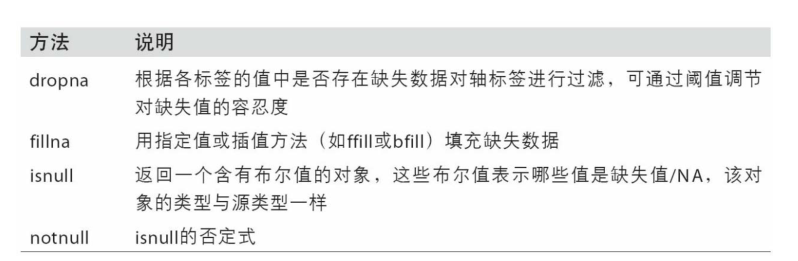

## 滤除缺失数据

过滤掉缺失数据的办法有很多种。你可以通过 pandas.isnull 或布尔索引的手
工方法，但 dropna 可能会更实用一些。对于一个 Series，dropna 返回一个仅
含非空数据和索引值的 Series：

In [6]:
from numpy import nan as NA

In [7]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [8]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [9]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

而对于 DataFrame 对象，事情就有点复杂了。你可能希望丢弃全 NA 或含有 NA
的行或列。dropna 默认丢弃任何含有缺失值的行：

In [10]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [11]:
cleaned

,0,1,2
0,1.0,6.5,3.0


传入 how='all'将只丢弃全为 NA 的那些行：

In [12]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


用这种方式丢弃列，只需传入 axis=1 即可：

In [13]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


另一个滤除 DataFrame 行的问题涉及时间序列数据。假设你只想留下一部分观
测数据，可以用 thresh 参数实现此目的：

In [15]:
df = pd.DataFrame(np.random.randn(7, 3))

In [16]:
df.iloc[:4, 1] = NA

In [17]:
df.iloc[:2, 2] = NA

In [18]:
df

,0,1,2
0,1.534599,NaN,NaN
1,-0.163221,NaN,NaN
2,1.119480,NaN,-0.922059
3,0.401729,NaN,0.509484
4,0.930966,1.343958,0.004112
5,-1.319103,0.802716,-0.051562
6,0.419127,0.540855,-1.084637


In [19]:
df.dropna()

,0,1,2
4,0.930966,1.343958,0.004112
5,-1.319103,0.802716,-0.051562
6,0.419127,0.540855,-1.084637


In [20]:
df.dropna(thresh=2)

,0,1,2
2,1.119480,NaN,-0.922059
3,0.401729,NaN,0.509484
4,0.930966,1.343958,0.004112
5,-1.319103,0.802716,-0.051562
6,0.419127,0.540855,-1.084637


In [21]:
df.dropna(thresh=3)

,0,1,2
4,0.930966,1.343958,0.004112
5,-1.319103,0.802716,-0.051562
6,0.419127,0.540855,-1.084637


## 填充缺失数据

你可能不想滤除缺失数据（有可能会丢弃跟它有关的其他数据），而是希望通
过其他方式填补那些“空洞”。对于大多数情况而言，fillna 方法是最主要的
函数。通过一个常数调用 fillna 就会将缺失值替换为那个常数值

In [22]:
df.fillna(0)

,0,1,2
0,1.534599,0.000000,0.000000
1,-0.163221,0.000000,0.000000
2,1.119480,0.000000,-0.922059
3,0.401729,0.000000,0.509484
4,0.930966,1.343958,0.004112
5,-1.319103,0.802716,-0.051562
6,0.419127,0.540855,-1.084637


若是通过一个字典调用 fillna，就可以实现对不同的列填充不同的值：

In [23]:
df.fillna({1:0.5, 2:0})

,0,1,2
0,1.534599,0.500000,0.000000
1,-0.163221,0.500000,0.000000
2,1.119480,0.500000,-0.922059
3,0.401729,0.500000,0.509484
4,0.930966,1.343958,0.004112
5,-1.319103,0.802716,-0.051562
6,0.419127,0.540855,-1.084637


fillna 默认会返回新对象，但也可以对现有对象进行就地修改：

In [24]:
_ = df.fillna(0, inplace=True)

In [25]:
df

,0,1,2
0,1.534599,0.000000,0.000000
1,-0.163221,0.000000,0.000000
2,1.119480,0.000000,-0.922059
3,0.401729,0.000000,0.509484
4,0.930966,1.343958,0.004112
5,-1.319103,0.802716,-0.051562
6,0.419127,0.540855,-1.084637


对 reindexing 有效的那些插值方法也可用于 fillna

In [26]:
df = pd.DataFrame(np.random.randn(6, 3))

In [27]:
df.iloc[2:, 1] = NA

In [28]:
df.iloc[4:, 2] = NA

In [29]:
df

,0,1,2
0,-0.369202,-1.790312,0.174873
1,0.183547,-0.364449,-0.313825
2,1.092346,NaN,1.023819
3,-1.075774,NaN,0.340195
4,0.235414,NaN,NaN
5,-0.454113,NaN,NaN


In [30]:
df.fillna(method='ffill')

,0,1,2
0,-0.369202,-1.790312,0.174873
1,0.183547,-0.364449,-0.313825
2,1.092346,-0.364449,1.023819
3,-1.075774,-0.364449,0.340195
4,0.235414,-0.364449,0.340195
5,-0.454113,-0.364449,0.340195


In [31]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.369202,-1.790312,0.174873
1,0.183547,-0.364449,-0.313825
2,1.092346,-0.364449,1.023819
3,-1.075774,-0.364449,0.340195
4,0.235414,NaN,0.340195
5,-0.454113,NaN,0.340195


只要有些创新，你就可以利用 fillna 实现许多别的功能。比如说，你可以传入
Series 的平均值或中位数

In [32]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [33]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

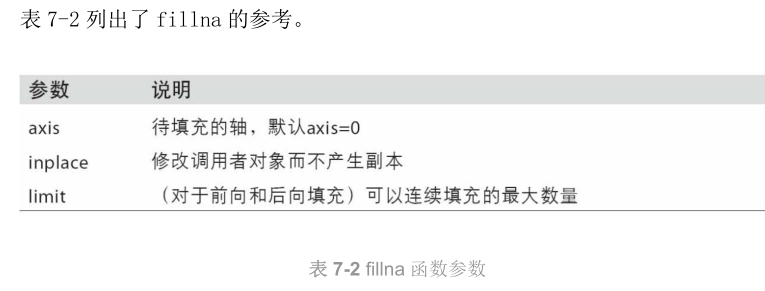

# 数据转换

### 移除重复数据

In [34]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 2, 3, 3, 4, 4]})

In [35]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


DataFrame 的 duplicated 方法返回一个布尔型 Series，表示各行是否是重复行
（前面出现过的行）：

In [36]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

还有一个与此相关的 drop_duplicates 方法，它会返回一个 DataFrame，重复
的数组会标为 False

In [37]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


这两个方法默认会判断全部列，你也可以指定部分列进行重复项判断。假设我
们还有一列值，且只希望根据 k1 列过滤重复项：

In [38]:
data['v1'] = range(7)

In [39]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


duplicated 和 drop_duplicates 默认保留的是第一个出现的值组合。传入
keep='last'则保留最后一个

In [40]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


# Transforming Data Using a Function or Mapping

In [41]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [42]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

Series 的 map 方法可以接受一个函数或含有映射关系的字典型对象，但是这里
有一个小问题，即有些肉类的首字母大写了，而另一些则没有。因此，我们还
需要使用 Series 的 str.lower 方法，将各个值转换为小写

In [43]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [44]:
data['animal'] = lowercased.map(meat_to_animal)

In [45]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


我们也可以传入一个能够完成全部这些工作的函数

In [46]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

使用 map 是一种实现元素级转换以及其他数据清理工作的便捷方式。

# Replacing Values

利用 fillna 方法填充缺失数据可以看做值替换的一种特殊情况。前面已经看
到，map 可用于修改对象的数据子集，而 replace 则提供了一种实现该功能的
更简单、更灵活的方式。我们来看看下面这个 Series：

In [47]:
 data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [48]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

-999 这个值可能是一个表示缺失数据的标记值。要将其替换为 pandas 能够理
解的 NA 值，我们可以利用 replace 来产生一个新的 Series（除非传入
inplace=True）：

In [49]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

如果你希望一次性替换多个值，可以传入一个由待替换值组成的列表以及一个
替换值：

In [50]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

要让每个值有不同的替换值，可以传递一个替换列表

In [51]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

传入的参数也可以是字典：

In [52]:
data.replace({-999:np.nan, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

笔记：data.replace 方法与 data.str.replace 不同，后者做的是字符串的元
素级替换。我们会在后面学习 Series 的字符串方法。

# Renaming Axis Indexes

跟 Series 中的值一样，轴标签也可以通过函数或映射进行转换，从而得到一个
新的不同标签的对象。轴还可以被就地修改，而无需新建一个数据结构

In [53]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

跟 Series 一样，轴索引也有一个 map 方法

In [54]:
transform = lambda x : x[:4].upper()

In [55]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

可以将其赋值给 index，这样就可以对 DataFrame 进行就地修改：

In [56]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


如果想要创建数据集的转换版（而不是修改原始数据），比较实用的方法是
rename：

In [57]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [58]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


rename 可以实现复制 DataFrame 并对其索引和列标签进行赋值。如果希望就地
修改某个数据集，传入 inplace=True 即可：

In [59]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [60]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


# 离散化和面元划分

为了便于分析，连续数据常常被离散化或拆分为“面元”（bin）。假设有一组
人员数据，而你希望将它们划分为不同的年龄组：

In [61]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

接下来将这些数据划分为“18 到 25”、“26 到 35”、“35 到 60”以及“60
以上”几个面元

In [62]:
bins = [18, 25, 35, 60, 100]

In [63]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

pandas 返回的是一个特殊的 Categorical 对象。结果展示了 pandas.cut 划分
的面元。你可以将其看做一组表示面元名称的字符串。它的底层含有一个表示
不同分类名称的类型数组，以及一个 codes 属性中的年龄数据的标签

In [64]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [65]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [66]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

pd.value_counts(cats)是 pandas.cut 结果的面元计数

跟“区间”的数学符号一样，圆括号表示开端，而方括号则表示闭端（包
括）。哪边是闭端可以通过 right=False 进行修改

In [67]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

可 以通过传递一个列表或数组到 labels，设置自己的面元名称：

In [68]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [69]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [70]:
data = np.random.rand(20)

如果向 cut 传入的是面元的数量而不是确切的面元边界，则它会根据数据的最
小值和最大值计算等长面元

In [71]:
pd.cut(data, 4, precision=2)

[(0.78, 1.0], (0.34, 0.56], (0.11, 0.34], (0.56, 0.78], (0.78, 1.0], ..., (0.11, 0.34], (0.34, 0.56], (0.78, 1.0], (0.78, 1.0], (0.56, 0.78]]
Length: 20
Categories (4, interval[float64]): [(0.11, 0.34] < (0.34, 0.56] < (0.56, 0.78] < (0.78, 1.0]]

qcut 是一个非常类似于 cut 的函数，它可以根据样本分位数对数据进行面元划
分。根据数据的分布情况，cut 可能无法使各个面元中含有相同数量的数据
点。而 qcut 由于使用的是样本分位数，因此可以得到大小基本相等的面元：

In [72]:
data = np.random.randn(1000) # Normally distributed

In [73]:
cats = pd.qcut(data, 4)
cats

[(-3.658, -0.672], (-0.0665, 0.532], (0.532, 3.134], (0.532, 3.134], (-0.0665, 0.532], ..., (-0.0665, 0.532], (-0.0665, 0.532], (-0.0665, 0.532], (0.532, 3.134], (-0.672, -0.0665]]
Length: 1000
Categories (4, interval[float64]): [(-3.658, -0.672] < (-0.672, -0.0665] < (-0.0665, 0.532] < (0.532, 3.134]]

In [74]:
pd.value_counts(cats)

(0.532, 3.134]       250
(-0.0665, 0.532]     250
(-0.672, -0.0665]    250
(-3.658, -0.672]     250
dtype: int64

与 cut 类似，你也可以传递自定义的分位数（0 到 1 之间的数值，包含端
点）：

In [75]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-3.658, -1.27], (-0.0665, 1.209], (1.209, 3.134], (1.209, 3.134], (-0.0665, 1.209], ..., (-0.0665, 1.209], (-0.0665, 1.209], (-0.0665, 1.209], (1.209, 3.134], (-1.27, -0.0665]]
Length: 1000
Categories (4, interval[float64]): [(-3.658, -1.27] < (-1.27, -0.0665] < (-0.0665, 1.209] < (1.209, 3.134]]

# 检测和过滤异常值

In [76]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.002995,0.028384,-0.007456,-0.002870
std,0.980575,0.994312,0.982446,0.994216
min,-2.919537,-3.208767,-2.979791,-4.017361
25%,-0.695955,-0.631416,-0.656446,-0.657752
50%,-0.016532,0.055814,0.030010,0.019553
75%,0.678313,0.702439,0.612850,0.635829
max,2.691739,3.504374,3.328671,3.188539


In [77]:
col = data[2]

In [78]:
col

0      1.027557
1     -0.117734
2     -0.873984
3     -0.276895
4      1.014095
5     -1.666768
6      1.130486
7     -0.004183
8      0.654015
9     -2.479971
10    -0.753233
11     0.174487
12    -0.357402
13    -2.247264
14     0.330530
15    -0.250776
16     0.176708
17     0.865030
18    -0.886618
19     1.236572
20    -0.138742
21     0.053637
22    -0.969344
23     1.596910
24     0.946994
25     1.685550
26    -0.461245
27    -2.238062
28     0.892064
29    -0.647310
         ...   
970    1.169424
971   -1.427826
972   -0.995333
973   -0.252861
974    1.526965
975   -0.334506
976   -0.031043
977   -0.174868
978   -0.525200
979    0.738919
980   -1.191822
981    0.541799
982   -1.226520
983    0.276440
984    0.402508
985   -0.493119
986   -0.198184
987    0.009205
988    1.699830
989    0.030354
990   -1.176616
991   -0.500998
992    0.280982
993    0.582902
994    0.370576
995   -0.526609
996    0.574996
997   -2.408746
998    0.514661
999   -0.915635
Name: 2, Length: 1000, d

In [79]:
col[np.abs(col) > 3]

44     3.066491
210    3.328671
Name: 2, dtype: float64

In [80]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
44,0.836516,-0.785425,3.066491,0.357468
210,0.748222,-0.755079,3.328671,0.224948
335,1.912726,-1.903890,-0.693074,-3.577803
522,-1.189230,3.504374,0.530281,0.876462
582,1.720244,3.369526,0.645881,-0.657372
587,0.595388,-3.208767,0.235125,-1.012640
858,-0.320918,0.434168,0.512669,-3.080178
888,0.762151,3.033101,-1.586300,-1.215929
967,-1.496297,0.823029,-0.342146,3.188539
977,-0.418078,-0.763698,-0.174868,-4.017361


In [81]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.002995,0.027686,-0.007851,-0.001383
std,0.980575,0.990736,0.981177,0.987858
min,-2.919537,-3.000000,-2.979791,-3.000000
25%,-0.695955,-0.631416,-0.656446,-0.657752
50%,-0.016532,0.055814,0.030010,0.019553
75%,0.678313,0.702439,0.612850,0.635829
max,2.691739,3.000000,3.000000,3.000000


根据数据的值是正还是负，np.sign(data)可以生成 1 和-1

In [82]:
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,1.0,1.0
1,1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0
4,-1.0,1.0,1.0,-1.0


# Permutation and Random Sampling

利用 numpy.random.permutation 函数可以轻松实现对 Series 或 DataFrame 的
列的排列工作（permuting，随机重排序）。通过需要排列的轴的长度调用
permutation，可产生一个表示新顺序的整数数组：

In [83]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [84]:
sampler = np.random.permutation(5)

In [85]:
sampler

array([0, 1, 2, 3, 4])

In [86]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [87]:
df.take(sampler)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


如果不想用替换的方式选取随机子集，可以在 Series 和 DataFrame 上使用
sample 方法：

In [88]:
df.sample(n=3)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
2,8,9,10,11


要通过替换的方式产生样本（允许重复选择），可以传递 replace=True 到
sample：

In [89]:
choices = pd.Series([5, 7, -1, 6, 4])

In [90]:
draws = choices.sample(n=10, replace=True)

In [91]:
draws

0    5
0    5
2   -1
4    4
2   -1
2   -1
2   -1
3    6
1    7
3    6
dtype: int64

# Computing Indicator/Dummy Variables计算指标/哑变量

另一种常用于统计建模或机器学习的转换方式是：将分类变量（categorical
variable）转换为“哑变量”或“指标矩阵”

如果 DataFrame 的某一列中含有 k 个不同的值，则可以派生出一个 k 列矩阵或
DataFrame（其值全为 1 和 0）。pandas 有一个 get_dummies 函数可以实现该功
能（其实自己动手做一个也不难）

In [92]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


有时候，你可能想给指标 DataFrame 的列加上一个前缀，以便能够跟其他数据
进行合并。get_dummies 的 prefix 参数可以实现该功能：

In [93]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [94]:
df_with_dummy = df[['data1']].join(dummies)

In [95]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


如果 DataFrame 中的某行同属于多个分类，则事情就会有点复杂。看一下
MovieLens 1M 数据集

In [96]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

C:\Users\69547\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


要为每个 genre 添加指标变量就需要做一些数据规整操作。首先，我们从数据
集中抽取出不同的 genre 值：

In [97]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [98]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

构建指标 DataFrame 的方法之一是从一个全零 DataFrame 开始

In [99]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

现在，迭代每一部电影，并将 dummies 各行的条目设为 1。要这么做，我们使
用 dummies.columns 来计算每个类型的列索引

In [100]:
gen = movies.genres[0]

In [101]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [102]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [103]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [104]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Adventure                                0
Genre_Fantasy                                  0
Genre_Romance                                  0
Genre_Drama                                    0
Genre_Action                                   0
Genre_Crime                                    0
Genre_Thriller                                 0
Genre_Horror                                   0
Genre_Sci-Fi                                   0
Genre_Documentary                              0
Genre_War                                      0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Film-Noir                                0
Genre_Western       

笔记：对于很大的数据，用这种方式构建多成员指标变量就会变得非常慢。最
好使用更低级的函数，将其写入 NumPy 数组，然后结果包装在 DataFrame 中。

一个对统计应用有用的秘诀是：结合 get_dummies 和诸如 cut 之类的离散化函
数：

In [105]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [106]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


# 字符串操作

In [107]:
val = 'a, b, guido'
val.split(',')

['a', ' b', ' guido']

In [108]:
pieces = [x.strip() for x in val.split(',')]   # 去除空白符
pieces

['a', 'b', 'guido']

In [109]:
first, second, third = pieces

In [110]:
first + '::' +  second + '::' + third

'a::b::guido'

In [111]:
'::'.join(pieces)

'a::b::guido'

其它方法关注的是子串定位。检测子串的最佳方式是利用 Python 的 in 关键
字，还可以使用 index 和 find：

In [112]:
'guido' in val

True

In [113]:
val.index(',')

1

In [114]:
val.find(':')

-1

In [115]:
val.find('b')

3

注意 find 和 index 的区别：如果找不到字符串，index 将会引发一个异常（而
不是返回－1）

In [116]:
val.count(',')

2

replace 用于将指定模式替换为另一个模式。通过传入空字符串，它也常常用
于删除模式

In [117]:
val.replace(',', '::')

'a:: b:: guido'

In [118]:
val.replace(',', '')

'a b guido'

In [119]:
val.replace(',', ' ')

'a  b  guido'

In [120]:
val1 = 'a,b, giodd'

In [121]:
val1.replace(',', '')

'ab giodd'

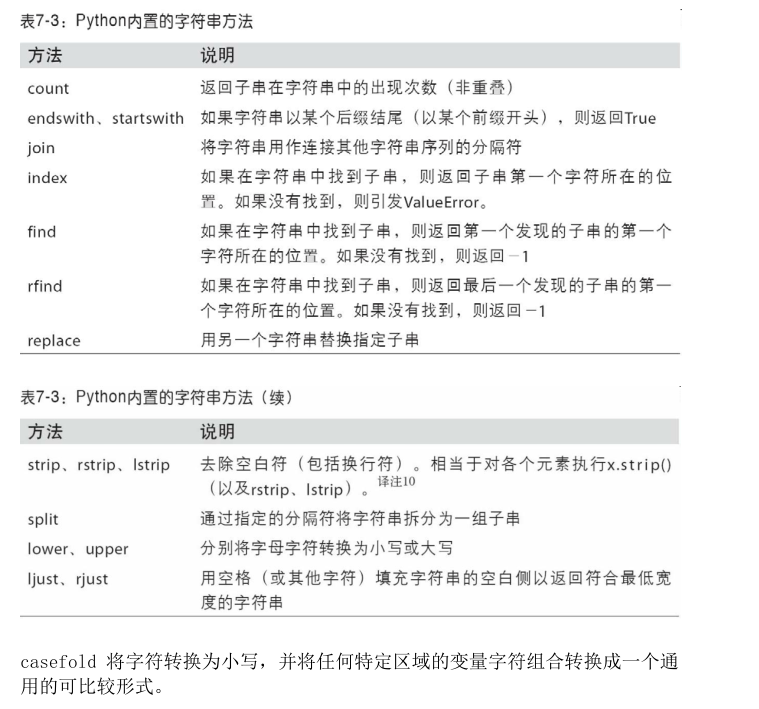

## 正则表达式

re 模块的函数可以分为三个大类：模式匹配、替换以及拆分。当然，它们之间
是相辅相成的

In [122]:
import re

In [123]:
text = "foo bar\t baz \tqux"

调用 re.split('\s+',text)时，正则表达式会先被编译，然后再在 text 上调
用其 split 方法

In [124]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

你可以用 re.compile 自己编译 regex 以得到一个可重用的
regex 对象

In [125]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

如果只希望得到匹配 regex 的所有模式，则可以使用 findall 方法

In [126]:
regex.findall(text)

[' ', '\t ', ' \t']

笔记：如果想避免正则表达式中不需要的转义（\），则可以使用原始字符串字
面量如 r'C:\x'（也可以编写其等价式'C:\x'）

如果打算对许多字符串应用同一条正则表达式，强烈建议通过 re.compile 创建
regex 对象。这样将可以节省大量的 CPU 时间。


match 和 search 跟 findall 功能类似。findall 返回的是字符串中所有的匹配
项，而 search 则只返回第一个匹配项。match 更加严格，它只匹配字符串的首
部。来看一个小例子，假设我们有一段文本以及一条能够识别大部分电子邮件
地址的正则表达式：

In [127]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

In [128]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [131]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [132]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

search 返回的是文本中第一个电子邮件地址（以特殊的匹配项对象形式返
回）。对于上面那个 regex，匹配项对象只能告诉我们模式在原字符串中的起
始和结束位置：

In [133]:
m = regex.search(text)

In [134]:
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [135]:
text[m.start():m.end()]

'dave@google.com'

regex.match 则将返回 None，因为它只匹配出现在字符串开头的模式：

In [136]:
print(regex.match(text))

None


相关的，sub 方法可以将匹配到的模式替换为指定字符串，并返回所得到的新
字符串

In [137]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



假设你不仅想要找出电子邮件地址，还想将各个地址分成 3 个部分：用户名、
域名以及域后缀。要实现此功能，只需将待分段的模式的各部分用圆括号包起
来即可

In [138]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [139]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [140]:
m = regex.match('wesm@bright.net')

由这种修改过的正则表达式所产生的匹配项对象，可以通过其 groups 方法返回
一个由模式各段组成的元组：

In [141]:
m.groups()

('wesm', 'bright', 'net')

对于带有分组功能的模式，findall 会返回一个元组列表：

In [142]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

sub 还能通过诸如\1、\2 之类的特殊符号访问各匹配项中的分组。符号\1 对应
第一个匹配的组，\2 对应第二个匹配的组，以此类推

In [143]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



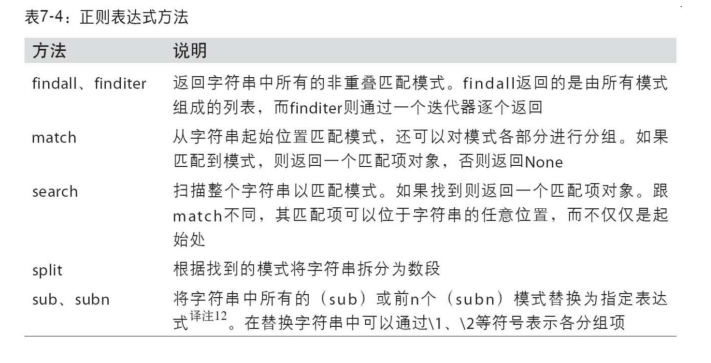

# pandas 的矢量化字符串函数

In [144]:
data = {'Dave': 'dave@google.com', 'Steve':
'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}

In [145]:
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [146]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

通过 data.map，所有字符串和正则表达式方法都能被应用于（传入 lambda 表
达式或其他函数）各个值，但是如果存在 NA（null）就会报错。为了解决这个
问题，Series 有一些能够跳过 NA 值的面向数组方法，进行字符串操作。通过
Series 的 str 属性即可访问这些方法。例如，我们可以通过 str.contains 检
查各个电子邮件地址是否含有"gmail"：

In [147]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [148]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [149]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

有两个办法可以实现矢量化的元素获取操作：要么使用 str.get，要么在 str
属性上使用索引：

In [150]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

要访问嵌入列表中的元素，我们可以传递索引到这两个函数中：

In [151]:
matches.str.get(1)

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [155]:
matches.str.get(2)

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [152]:
matches.str.get(0)

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

可以利用这种方法对字符串进行截取：

In [153]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

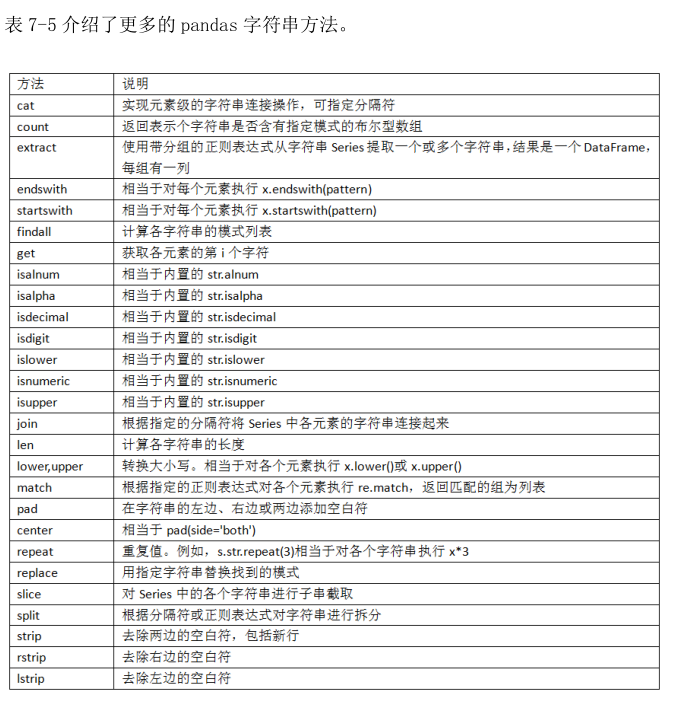